In [1]:
#Mount to google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Link to folder
import os
os.chdir("/content/drive/My Drive/datafolder")

In [4]:
import tensorflow
print(tensorflow.__version__)

2.8.2


In [5]:
import cv2,os
data_path='/content/drive/MyDrive/datafolder/BabyDataSet/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'happy': 0, 'angry': 1, 'sad': 2}
['happy', 'angry', 'sad']
[0, 1, 2]


In [6]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: Op

In [7]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [8]:
new_target.shape

(271, 3)

In [9]:
data.shape[1:]


(100, 100, 3)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  

In [18]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [19]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=30,validation_split=0.2)

Epoch 1/30
7/7 [==============================] - 12s 2s/step - loss: 1.3289 - accuracy: 0.3196 - val_loss: 1.1011 - val_accuracy: 0.2857
Epoch 2/30
7/7 [==============================] - 11s 2s/step - loss: 1.1170 - accuracy: 0.2938 - val_loss: 1.1080 - val_accuracy: 0.3878
Epoch 3/30
7/7 [==============================] - 11s 2s/step - loss: 1.1285 - accuracy: 0.3041 - val_loss: 1.0754 - val_accuracy: 0.3878
Epoch 4/30
7/7 [==============================] - 11s 2s/step - loss: 1.0688 - accuracy: 0.3299 - val_loss: 1.0437 - val_accuracy: 0.4082
Epoch 5/30
7/7 [==============================] - 12s 2s/step - loss: 1.0348 - accuracy: 0.4794 - val_loss: 1.0617 - val_accuracy: 0.3265
Epoch 6/30
7/7 [==============================] - 11s 2s/step - loss: 1.0267 - accuracy: 0.4897 - val_loss: 1.0289 - val_accuracy: 0.4694
Epoch 7/30
7/7 [==============================] - 11s 2s/step - loss: 0.9498 - accuracy: 0.5722 - val_loss: 1.2218 - val_accuracy: 0.3469
Epoch 8/30
7/7 [==================

In [20]:

model.save('modelbaby.h5')

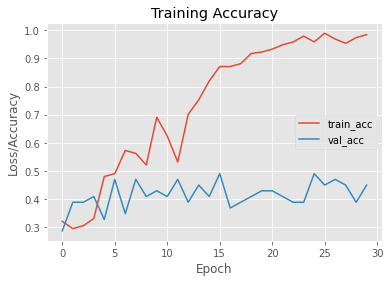

In [21]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 30
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

